# Importing Libraries

# **DO NOT CHANGE CODE**

In [8]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [9]:
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import confusion_matrix , classification_report

In [10]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

In [11]:
import warnings
warnings.filterwarnings('ignore')

In [12]:
df1 = pd.read_csv(r"C:\Users\vinayak\minor_proj\collabRV\collabRV\Z_Current\Neural network\Sets\random_imputed_2.csv",index_col=[0])
df1.sample(5)

,body.temperature,pulse,respiration,systolic.blood.pressure,diastolic.blood.pressure,map,BMI,type.of.heart.failure,NYHA.cardiac.function.classification,Killip.grade,...,reduced.hemoglobin,potassium.ion,chloride.ion,sodium.ion,glucose.blood.gas,carboxyhemoglobin,oxygen.saturation,partial.oxygen.pressure,oxyhemoglobin,total.hemoglobin
inpatient.number,,,,,,,,,,,,,,,,,,,,,
739659,36.7,38,19,148,48,81.333333,19.531250,2,4,2,...,3.496241,4.292861,102.653753,139.793981,5.060514,0.539341,94.551520,102.367210,95.651994,160.392722
766722,36.0,66,18,140,100,113.333333,19.387755,2,3,2,...,3.500000,3.730000,109.000000,136.900000,5.300000,0.300000,97.000000,94.000000,95.900000,119.000000
773604,36.9,76,19,150,90,110.000000,16.847469,0,2,1,...,1.675570,4.199536,101.928337,144.167586,4.814379,0.108971,97.186925,107.390953,94.763602,158.736339
742203,36.6,67,18,130,82,98.000000,22.491349,2,3,1,...,2.129716,3.633637,101.510444,140.354682,5.581311,0.165543,96.382334,88.895703,96.301176,155.565676
820333,36.2,50,18,180,100,126.666667,24.973985,2,3,3,...,13.700000,4.840000,110.000000,138.800000,5.600000,0.300000,86.000000,56.000000,85.700000,100.000000


In [13]:
df3=pd.read_csv(r"C:\Users\vinayak\minor_proj\collabRV\collabRV\Z_Current\Neural network\Sets\drug_onehot_latest.csv",index_col=[0])
df3.head()


,Atorvastatin calcium tablet,Benazepril hydrochloride tablet,Deslanoside injection,Digoxin tablet,Dobutamine hydrochloride injection,Furosemide injection,Furosemide tablet,Hydrochlorothiazide tablet,Isoprenaline Hydrochloride injection,Isosorbide Mononitrate Sustained Release tablet,Meglumine Adenosine Cyclophosphate for injection,Milrinone injection,Nitroglycerin injection,Shenfu injection,Spironolactone tablet,Torasemide tablet,Valsartan Dispersible tablet,sulfotanshinone sodium injection
inpatient.number,,,,,,,,,,,,,,,,,,
722128,0,0,1,1,0,1,1,0,0,0,0,1,0,0,1,0,0,0
723327,1,0,1,1,0,1,1,0,0,1,0,1,0,0,1,1,1,0
723617,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
724385,0,0,1,1,0,1,1,0,0,0,0,1,0,0,1,0,0,0
725509,0,0,1,1,0,1,1,0,0,0,0,1,0,1,1,1,0,0


In [14]:
r="Isoprenaline Hydrochloride injection"


#  Isoprenaline


In [15]:
df2=df3[r]
df=pd.concat([df1,df2],axis=1)
cols_to_scale = [df.columns]
scaler = MinMaxScaler()
scaled_df= scaler.fit_transform(df)
df = pd.DataFrame(scaled_df,columns = df.columns)

In [16]:
X = df.drop(r,axis='columns')
y = df[r]


In [17]:
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X)
PCA_df = pd.DataFrame(data = X_pca)
PCA_df = pd.concat([PCA_df, df[r]], axis = 1)
PCA_df.head()

,0,1,2,3,4,5,6,7,8,9,...,37,38,39,40,41,42,43,44,45,Isoprenaline Hydrochloride injection
0,0.485152,-0.268583,-0.507123,0.513626,-0.233606,0.030368,0.058925,-0.343838,0.243563,0.286981,...,0.081991,0.090898,-0.017447,0.121411,-0.015282,0.080368,-0.118612,-0.045980,-0.011813,0.0
1,-0.145042,-0.353461,-0.183404,-0.139457,-0.245284,-0.129782,0.252421,-0.349743,0.220273,0.805366,...,-0.099277,0.057628,0.085873,-0.022387,-0.130570,0.083693,0.089900,0.141666,0.119717,0.0
2,-0.173621,-0.210423,-0.200054,-0.314970,0.105571,-0.199907,-0.110117,0.278727,-0.162158,0.274271,...,-0.130396,-0.007525,0.038919,-0.133981,0.069500,0.077070,0.069247,-0.060637,-0.157007,0.0
3,0.396161,-0.094074,-0.584406,0.188463,0.424859,0.632022,-0.447740,-0.320468,0.039108,-0.089374,...,-0.076964,0.109443,-0.010140,0.230267,0.041187,-0.201982,0.065821,-0.019499,-0.062648,0.0
4,-0.427098,-0.211032,0.043938,0.211464,-0.214811,-0.171968,-0.411327,-0.091980,0.044690,-0.117016,...,0.027913,-0.207839,0.081620,0.099522,-0.040893,0.002526,0.224720,0.039183,-0.006331,0.0


In [18]:
count_class_0, count_class_1 = PCA_df[r].value_counts()[0], PCA_df[r].value_counts()[1]
# Divide by class
df_class_0 = PCA_df[PCA_df[r] == 0]
df_class_1 = PCA_df[PCA_df[r] == 1]

In [19]:
PCA_df[r].value_counts(ascending =True)

1.0      30
0.0    1973
Name: Isoprenaline Hydrochloride injection, dtype: int64

In [20]:
# Oversample 1-class and concat the DataFrames of both classes( if count of 0 greater than count of 1)
# Oversample 0-class and concat the DataFrames of both classes( if count of 0 lesser than count of 1)
if count_class_0>count_class_1:
    df_class_1_over = df_class_1.sample(count_class_0, replace=True)
    df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

    print('Random over-sampling:')
    print(df_test_over[r].value_counts())
else:
    df_class_0_over = df_class_0.sample(count_class_1,replace=True)
    df_test_over = pd.concat([df_class_0_over, df_class_1], axis=0)

    print('Random over-sampling:')
    print(df_test_over[r].value_counts())

Random over-sampling:
0.0    1973
1.0    1973
Name: Isoprenaline Hydrochloride injection, dtype: int64


In [21]:
X = df_test_over.drop(r,axis='columns')
y = df_test_over[r]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [22]:
y_train.value_counts()

0.0    1578
1.0    1578
Name: Isoprenaline Hydrochloride injection, dtype: int64

In [23]:
from sklearn.svm import SVC
from sklearn.datasets import load_breast_cancer
from yellowbrick.model_selection import learning_curve

svm = SVC(C=1, kernel='linear', gamma='scale',probability=True)
#print(learning_curve(svm, X, y, cv=10, scoring='accuracy'))


In [24]:
svm.fit(X_train,y_train)

SVC(C=1, kernel='linear', probability=True)

In [25]:
svm.score(X_train,y_train)

0.8849809885931559

In [26]:
svm.score(X_test,y_test)

0.8721518987341772

In [27]:
y_preds = svm.predict(X_test)
y_preds = np.round(y_preds)

print("Classification Report: \n", classification_report(y_test, y_preds))


Classification Report: 
               precision    recall  f1-score   support

         0.0       0.93      0.81      0.86       395
         1.0       0.83      0.94      0.88       395

    accuracy                           0.87       790
   macro avg       0.88      0.87      0.87       790
weighted avg       0.88      0.87      0.87       790



In [28]:
# get the probability distribution
probas = svm.predict_proba(X_test)
# # plot
# plt.figure(dpi=150)
# plt.hist(probas, bins=20)
# plt.title('Classification Probabilities')
# plt.xlabel('Probability')
# plt.ylabel('# of Instances')
# plt.xlim([0.5, 1.0])
# # plt.legend(target_names)
# plt.show()

# This is the ROC curve for SVM for Isoprenaline

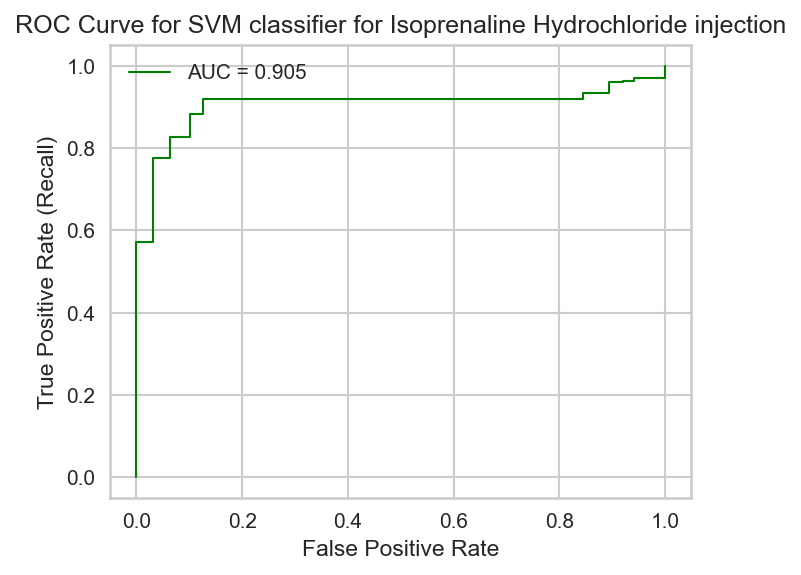

In [29]:
from sklearn.metrics import roc_curve, auc
# get false and true positive rates
fpr, tpr, thresholds = roc_curve(y_test, probas[:,0], pos_label=0)
# get area under the curve
roc_auc = auc(fpr, tpr)
# PLOT ROC curve
plt.figure(figsize=(5,4),dpi=150)
plt.plot(fpr, tpr, lw=1, color='green', label=f'AUC = {roc_auc:.3f}')
plt.title('ROC Curve for SVM classifier for Isoprenaline Hydrochloride injection')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.legend()
plt.show()


In [30]:
import seaborn as sns

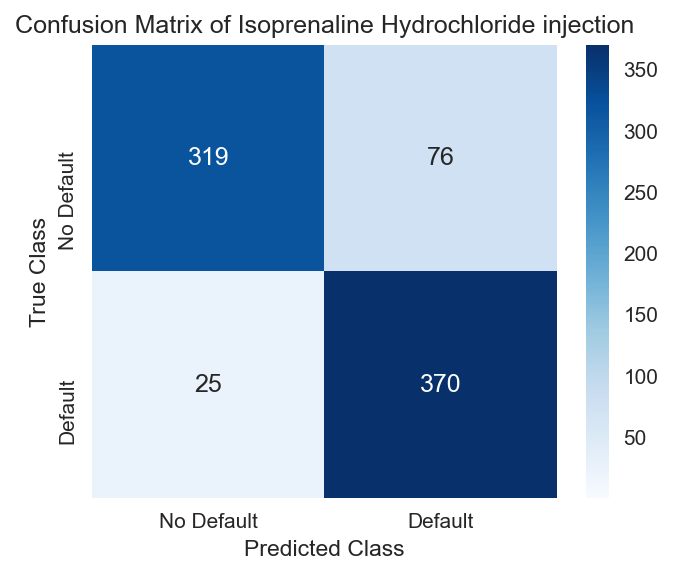

In [31]:
cm = confusion_matrix(y_test, y_preds)
labels = ['No Default', 'Default']
plt.figure(figsize=(5,4),dpi=150)
sns.heatmap(cm,xticklabels=labels, yticklabels=labels, annot=True, fmt='d', cmap="Blues", vmin = 0.2);
plt.title('Confusion Matrix of Isoprenaline Hydrochloride injection')
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()